In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

%matplotlib inline

import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/capstone/Stock%20Market_1B_predictions/stock_market_data.csv')
df.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339097835,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.29248801,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229008,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734077645,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377358,-0.665162,0.372362,26.266234,6.440652,0.033847


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

In [25]:
df['datekey'].nunique()

584

In [26]:
(df['datekey'] == df['calendardate']).mean() # 83% they match. 


0.8301015467884897

In [27]:
df['calendardate'].unique() #'12/31/2019', '9/30/2019' pick this quarter, merge by Ticker
#add next quarters price. compute the return 

array(['3/31/2020', '12/31/2019', '9/30/2019', '6/30/2019', '3/31/2019',
       '12/31/2018', '9/30/2018', '6/30/2018', '3/31/2018', '12/31/2017',
       '9/30/2017', '6/30/2017', '3/31/2017', '12/31/2016', '12/31/2015',
       '9/30/2016', '6/30/2016', '3/31/2016', '9/30/2015', '6/30/2015',
       '3/31/2015', '6/30/2020'], dtype=object)

In [28]:
#df['calendardate'].unique()

In [29]:
df['calendardate'] = pd.to_datetime(df['calendardate'])

In [30]:
df = df[df['calendardate'].between('2019-09-30', '2019-12-30')]

In [31]:
df['calendardate']

2       2019-09-30
17      2019-09-30
31      2019-09-30
52      2019-09-30
66      2019-09-30
           ...    
40176   2019-09-30
40197   2019-09-30
40218   2019-09-30
40239   2019-09-30
40258   2019-09-30
Name: calendardate, Length: 2018, dtype: datetime64[ns]

df['calendardate'] = pd.to_datetime(df['calendardate'])
df['year'] = df['calendardate'].dt.year
df['month'] = df['calendardate'].dt.month
df['day'] = df['calendardate'].dt.day

In [32]:
df_copy = df.copy() #can cluster labels in df copy for cluster analyses.

In [33]:
drop_cols = ['datekey', 'calendardate', 'TOT_DEBT_TO_TOTAL_ASSET', 'PX_FREE_CASH_FLOW', 'REVENUE_PER_SHARE', 'CASH_FLOW_PER_SHARE',
            'OPER_MARGIN', 'RETURN_ON_ASSET', 'PX_TO_BOOK_RATIO', 'ticker']
df.drop(columns = drop_cols, inplace=True)

In [34]:
#find out what's the fastest way to find upper case and drop them.

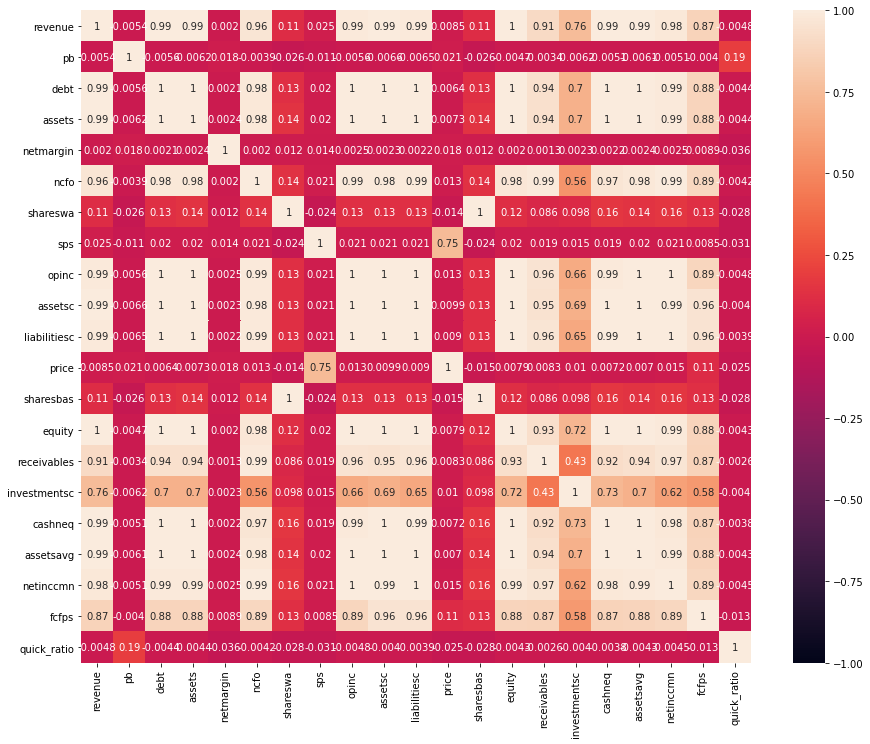

In [35]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [39]:
#scaler = StandardScaler() #to make the mean 0 and std = 1
scaler = MinMaxScaler() #max - 1 min = 0
scaled = scaler.fit_transform(df)



In [40]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [41]:
#standardscale

In [42]:
#look at sigma and check, whaterver has the highest = keep it. std()
#sector to keep. binary doesnt need corr. 

In [43]:
scaled_df.std()


revenue         0.024824
pb              0.031551
debt            0.023871
assets          0.023987
netmargin       0.030331
ncfo            0.022581
shareswa        0.040695
sps             0.026946
opinc           0.023134
assetsc         0.026892
liabilitiesc    0.026450
price           0.038615
sharesbas       0.040820
equity          0.024155
receivables     0.022274
investmentsc    0.027599
cashneq         0.024469
assetsavg       0.024190
netinccmn       0.023223
fcfps           0.019459
quick_ratio     0.027202
dtype: float64

In [18]:
df['revenue'].std()

189660048783.75153

how to convert tickers to numbers?

# Standarizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
#scaled_df = scale(df)

In [ ]:
#take one quarter of the data = 2000 samples, ticker can drop when doing cluster, 
clean, no corr
standard scaler
cluster

In [ ]:
Oper_MARGIN check is it has nAS, upper case cols
work with row numbers, drop the upper case. 


In [ ]:
#try 100 samples first then all

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(all_data)

In [ ]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
